# Supervised Learning — Classification Models

In this step, we train and evaluate different classification models on heart disease dataset. These models will learn to predict the presence or severity of heart disease based on the selected features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc 
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset
df = pd.read_csv("../Data/heart_disease_features_selected.csv")
X = df.drop("num", axis=1)
y = df["num"]

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [4]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # probability=True needed for ROC
}

results = {}

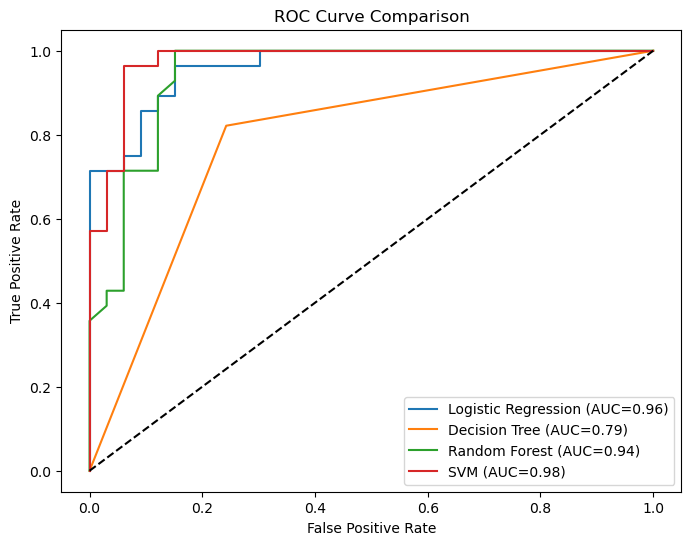

In [6]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    # metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) 
    
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC": auc
    }
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)   
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
    
# ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [7]:
# print metrics table
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]).T
print(results_df)

                     Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression  0.868852   0.833333  0.892857  0.862069  0.962121
Decision Tree        0.786885   0.741935  0.821429  0.779661  0.789502
Random Forest        0.901639   0.843750  0.964286  0.900000  0.943723
SVM                  0.934426   0.900000  0.964286  0.931034  0.976190


In [8]:
# Save metrics
with open("evaluation_metrics.txt", "w") as f:
    for model, metrics in results.items():
        f.write(f"{model}:\n")
        for m, v in metrics.items():
            f.write(f"{m}: {v:.4f}\n")
        f.write("\n")

--------------------